In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

2023-02-23 12:18:07.043946: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated SAR data

In [3]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/"

In [4]:
with open(data_dir + 'collocated_dict_5e_5_filtered.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [5]:
df = pd.concat(d.values(), ignore_index=True)
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,lon,datetime_rounded,valid_flag,s0_norm,s0,inc,az,s0_max,s0_min,s0_std
0,0.131507,0.306354,344.480002,2476.816541,1005.776480,1006.983499,5.750744,5.858569,73.541799,72.235029,...,-124.30400,2018-04-11 14:00:00,True,-7.755438,-8.815776,32.142911,280.917511,-8.815776,-8.815776,0.0
1,0.169644,0.076862,301.660002,2477.280367,1011.450370,1012.675998,5.016032,5.128066,77.170098,76.182660,...,-124.30400,2018-04-12 14:00:00,True,-7.311450,-15.691008,42.147045,279.718475,-15.691008,-15.691008,0.0
2,0.025622,-0.383063,274.325002,2476.904365,1020.987403,1022.212997,4.964464,5.199127,66.090098,63.038793,...,-124.30400,2018-04-23 15:00:00,True,-10.255534,-13.824358,32.153725,280.917114,-13.824358,-13.824358,0.0
3,-0.202953,-0.490062,309.255003,2476.669098,1013.606853,1014.807996,4.241058,4.533348,44.618498,40.755557,...,-124.30400,2018-04-24 14:00:00,True,-8.636513,-18.343288,42.149823,279.718201,-18.343288,-18.343288,0.0
4,-0.026441,-0.730744,320.615001,2475.218603,1018.266915,1019.488495,7.084940,7.120605,91.120398,91.004979,...,-124.30400,2018-05-05 14:00:00,True,-14.836988,-22.981560,32.146370,280.917114,-22.981560,-22.981560,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,0.078067,-0.018678,257.755003,2492.003937,994.435538,995.682013,2.661181,2.718112,73.889103,72.947993,...,-39.47378,2020-01-16 09:00:00,True,-9.140169,-12.834813,33.753190,281.969360,-12.834813,-12.834813,0.0
406,0.078067,-0.018678,257.135000,2491.579194,994.525701,995.769507,2.913308,2.980954,77.774753,76.929502,...,-39.47378,2020-01-16 20:00:00,True,-9.058357,-17.941219,40.544464,439.776978,-17.941219,-17.941219,0.0
407,0.078067,-0.018678,238.530001,2491.798855,999.285638,1000.545505,2.513606,2.630492,80.575903,79.902359,...,-39.47378,2020-01-17 09:00:00,True,-6.148265,-12.268633,40.734668,280.223236,-12.268633,-12.268633,0.0
408,0.078067,-0.018678,266.660001,2491.502372,1002.762277,1004.015002,2.848601,2.917305,75.022252,74.087723,...,-39.47378,2020-01-17 20:00:00,True,-11.094656,-16.578063,33.539628,438.030487,-16.578063,-16.578063,0.0


In [6]:
df = df.dropna(subset=['UWr', 'rhoair'])
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,lon,datetime_rounded,valid_flag,s0_norm,s0,inc,az,s0_max,s0_min,s0_std
0,0.131507,0.306354,344.480002,2476.816541,1005.776480,1006.983499,5.750744,5.858569,73.541799,72.235029,...,-124.30400,2018-04-11 14:00:00,True,-7.755438,-8.815776,32.142911,280.917511,-8.815776,-8.815776,0.0
1,0.169644,0.076862,301.660002,2477.280367,1011.450370,1012.675998,5.016032,5.128066,77.170098,76.182660,...,-124.30400,2018-04-12 14:00:00,True,-7.311450,-15.691008,42.147045,279.718475,-15.691008,-15.691008,0.0
2,0.025622,-0.383063,274.325002,2476.904365,1020.987403,1022.212997,4.964464,5.199127,66.090098,63.038793,...,-124.30400,2018-04-23 15:00:00,True,-10.255534,-13.824358,32.153725,280.917114,-13.824358,-13.824358,0.0
3,-0.202953,-0.490062,309.255003,2476.669098,1013.606853,1014.807996,4.241058,4.533348,44.618498,40.755557,...,-124.30400,2018-04-24 14:00:00,True,-8.636513,-18.343288,42.149823,279.718201,-18.343288,-18.343288,0.0
4,-0.026441,-0.730744,320.615001,2475.218603,1018.266915,1019.488495,7.084940,7.120605,91.120398,91.004979,...,-124.30400,2018-05-05 14:00:00,True,-14.836988,-22.981560,32.146370,280.917114,-22.981560,-22.981560,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,0.078067,-0.018678,257.755003,2492.003937,994.435538,995.682013,2.661181,2.718112,73.889103,72.947993,...,-39.47378,2020-01-16 09:00:00,True,-9.140169,-12.834813,33.753190,281.969360,-12.834813,-12.834813,0.0
406,0.078067,-0.018678,257.135000,2491.579194,994.525701,995.769507,2.913308,2.980954,77.774753,76.929502,...,-39.47378,2020-01-16 20:00:00,True,-9.058357,-17.941219,40.544464,439.776978,-17.941219,-17.941219,0.0
407,0.078067,-0.018678,238.530001,2491.798855,999.285638,1000.545505,2.513606,2.630492,80.575903,79.902359,...,-39.47378,2020-01-17 09:00:00,True,-6.148265,-12.268633,40.734668,280.223236,-12.268633,-12.268633,0.0
408,0.078067,-0.018678,266.660001,2491.502372,1002.762277,1004.015002,2.848601,2.917305,75.022252,74.087723,...,-39.47378,2020-01-17 20:00:00,True,-11.094656,-16.578063,33.539628,438.030487,-16.578063,-16.578063,0.0


In [7]:
df = df.sample(frac = 1, random_state=77)
df     

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,lon,datetime_rounded,valid_flag,s0_norm,s0,inc,az,s0_max,s0_min,s0_std
300,-0.012150,-0.032903,327.125002,2491.398764,1034.871906,1036.155530,4.100282,4.110465,95.989404,96.187439,...,-39.47378,2021-04-05 09:00:00,True,-14.918911,-29.809161,40.733684,280.224518,-29.809161,-29.809161,0.0
381,0.078067,-0.018678,316.379997,2486.020202,1001.087127,1002.327002,4.116639,4.159194,91.359453,91.275100,...,-39.47378,2019-11-05 23:00:00,True,-8.355029,-16.680374,40.732366,280.222870,-16.680374,-16.680374,0.0
108,-0.048482,-0.054835,333.104999,2477.888062,1011.927463,1013.146500,6.965927,6.980134,93.698100,93.687086,...,-39.47378,2016-08-05 09:00:00,True,-9.694715,-19.353100,40.723802,280.224518,-19.353100,-19.353100,0.0
94,0.098618,-0.014385,353.225000,2481.278990,1014.799327,1016.010495,7.905501,7.798062,91.634647,91.269765,...,-70.77850,2018-02-07 23:00:00,True,-6.935540,-15.135897,42.400538,440.389984,-15.135897,-15.135897,0.0
289,-0.012150,-0.032903,293.824998,2491.803394,1008.456695,1009.699500,4.259576,4.288183,86.213853,85.824327,...,-39.47378,2021-03-05 09:00:00,True,-11.330360,-17.218870,33.757924,282.000641,-17.218870,-17.218870,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,-0.012150,-0.032903,339.339998,2490.820422,993.575404,994.797507,4.975317,4.980046,95.771354,95.886296,...,-39.47378,2021-03-17 06:00:00,True,-9.551195,-13.658052,33.754719,282.000427,-13.658052,-13.658052,0.0
235,-0.012150,-0.032903,263.644999,2487.925266,991.189028,992.409497,4.218824,4.268435,82.945053,82.477130,...,-39.47378,2020-11-12 09:00:00,True,-8.971364,-17.913435,40.732870,280.222595,-17.913435,-17.913435,0.0
84,-0.315976,0.132105,333.880003,2471.162107,1000.264070,1001.478503,5.270402,5.393428,84.232098,83.587054,...,-70.77850,2017-12-10 06:00:00,True,-7.685976,-16.634214,42.397246,440.389404,-16.634214,-16.634214,0.0
95,-0.009993,0.031252,282.370000,2485.421032,1020.108655,1021.350995,5.237911,5.273152,88.951097,88.615952,...,-70.77850,2018-02-14 22:00:00,True,-9.699736,-12.334466,31.666229,439.104034,-12.334466,-12.334466,0.0


In [8]:
c = df['stress']
y = - df['UWr'] * df['rhoair']

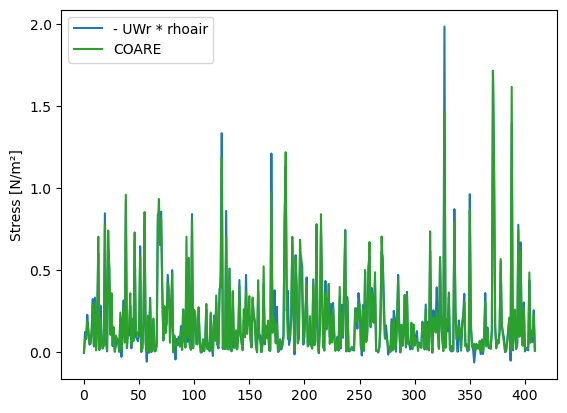

In [9]:
plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

In [10]:
df = df[( (df['UWr'] >= -2) & (df['UWr'] <= 2) )]               

In [11]:
400*0.8

320.0

In [12]:
split_idx = 320

# S0, inc, az

# Prepare features and labels

In [13]:
predictor_variables = ['s0', 'inc', 'az']

In [14]:
x = df[predictor_variables]
x

,s0,inc,az
300,-29.809161,40.733684,280.224518
381,-16.680374,40.732366,280.222870
108,-19.353100,40.723802,280.224518
94,-15.135897,42.400538,440.389984
289,-17.218870,33.757924,282.000641
...,...,...,...
293,-13.658052,33.754719,282.000427
235,-17.913435,40.732870,280.222595
84,-16.634214,42.397246,440.389404
95,-12.334466,31.666229,439.104034


In [15]:
y = - df['UWr'] * df['rhoair']
y

300   -0.003707
381    0.124103
108    0.083250
94     0.229089
289    0.130489
         ...   
293    0.079242
235    0.116743
84     0.063755
95     0.256668
215    0.016093
Length: 410, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

# COARE

In [16]:
c = df['stress']

In [17]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [18]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [19]:
c_train = c[:split_idx]
c_test = c[split_idx:]

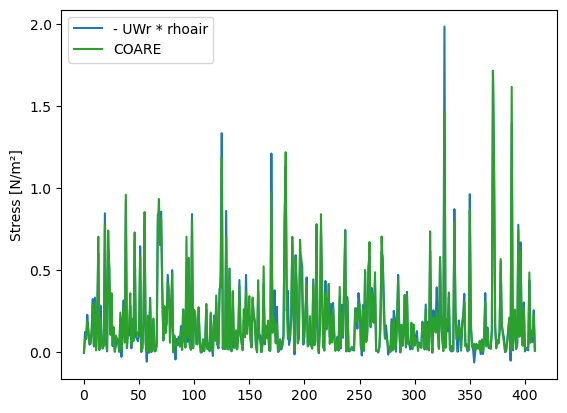

In [20]:

plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

# ML setup

In [21]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [22]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


# First experiment - Linear regression

In [23]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    #tf.keras.layers.Dense(16, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

2023-02-23 12:18:09.175615: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-02-23 12:18:09.175868: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-23 12:18:09.175878: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-23 12:18:09.175896: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c6525-bm5jvp3-bn-compute): /proc/driver/nvidia/version does not exist
2023-02-23 12:18:09.176099: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, 

Epoch 1/500
7/7 [==============================] - 1s 57ms/step - loss: 27001.8994 - mean_absolute_error: 160.5301 - val_loss: 28460.0625 - val_mean_absolute_error: 164.4727
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 25368.4158 - mean_absolute_error: 155.7732 - val_loss: 27535.9160 - val_mean_absolute_error: 161.7580
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 24738.8525 - mean_absolute_error: 153.7780 - val_loss: 26627.7969 - val_mean_absolute_error: 159.0455
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 24934.1680 - mean_absolute_error: 154.1096 - val_loss: 25737.1094 - val_mean_absolute_error: 156.3398
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 22945.2341 - mean_absolute_error: 148.1072 - val_loss: 24875.0391 - val_mean_absolute_error: 153.6759
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 22733.2468 - mean_absolute_error: 147.2350 - val_loss: 24029.61

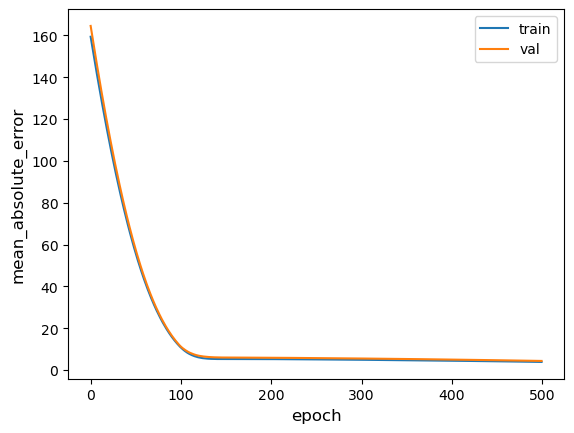

3/3 [==============================] - 0s 1ms/step - loss: 24.1326 - mean_absolute_error: 4.1186
Test accuracy 4.118619918823242
Test loss 24.132638931274414


In [24]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [25]:
y_test_pred = multi_dense_model.predict(x_test)

In [26]:
np.mean(y_test)

0.20288953337977453

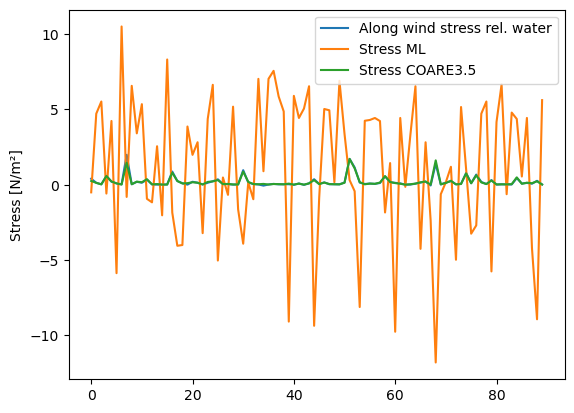

In [27]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [28]:
rmse(y_test.values, y_test_pred)

4.805276368987469

In [29]:
rmse(y_test.values, c_test)

0.06884559918794826

# Other experiments

In [30]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [31]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [32]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 0s 17ms/step - loss: 2.7199 - mean_absolute_error: 1.3291 - val_loss: 968.1313 - val_mean_absolute_error: 30.3782
Epoch 2/500
7/7 [==============================] - 0s 5ms/step - loss: 2.5960 - mean_absolute_error: 1.2842 - val_loss: 421.5602 - val_mean_absolute_error: 19.9779
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 2.4366 - mean_absolute_error: 1.2043 - val_loss: 246.1730 - val_mean_absolute_error: 15.2067
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 2.3810 - mean_absolute_error: 1.1504 - val_loss: 161.0950 - val_mean_absolute_error: 12.2456
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 2.3178 - mean_absolute_error: 1.2412 - val_loss: 112.4019 - val_mean_absolute_error: 10.1750
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 2.2656 - mean_absolute_error: 1.2276 - val_loss: 81.6164 - val_mean_absolute_error: 8.6179
Epoch 7/500
7/7 [

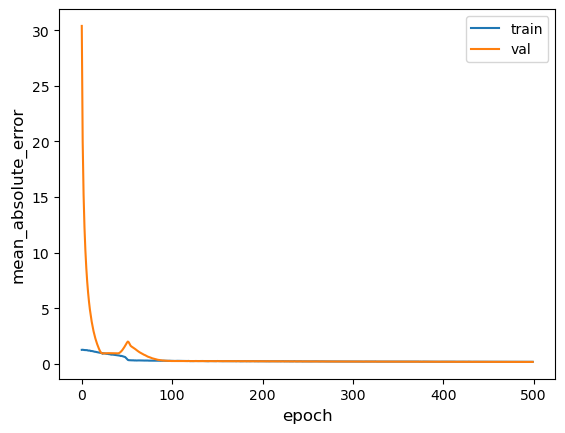

3/3 [==============================] - 0s 1ms/step - loss: 0.1008 - mean_absolute_error: 0.1935
Test accuracy 0.1934647411108017
Test loss 0.10076083242893219


In [33]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [34]:
y_test_pred = multi_dense_model.predict(x_test)

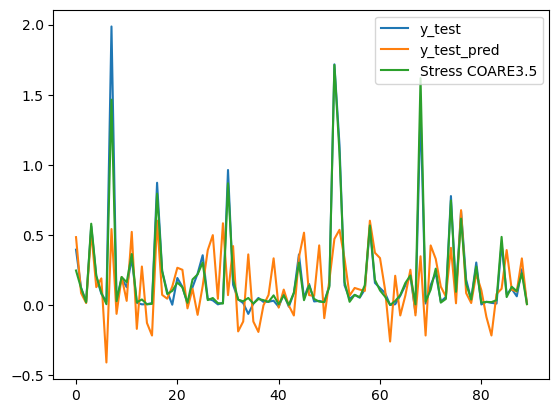

In [35]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [36]:
rmse(y_test.values, y_test_pred)

0.42737087437940685

## Correlation

In [37]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.49662526],
       [0.49662526, 1.        ]])

In [38]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

In [39]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [40]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [41]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 0s 16ms/step - loss: 0.1891 - mean_absolute_error: 0.3045 - val_loss: 31.6334 - val_mean_absolute_error: 5.4768
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 0.1747 - mean_absolute_error: 0.2922 - val_loss: 12.0653 - val_mean_absolute_error: 3.3720
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 0.1622 - mean_absolute_error: 0.2968 - val_loss: 7.3014 - val_mean_absolute_error: 2.6165
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 0.1306 - mean_absolute_error: 0.2671 - val_loss: 5.1269 - val_mean_absolute_error: 2.1882
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 0.1398 - mean_absolute_error: 0.2672 - val_loss: 3.6247 - val_mean_absolute_error: 1.8358
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 0.1262 - mean_absolute_error: 0.2569 - val_loss: 2.5002 - val_mean_absolute_error: 1.5200
Epoch 7/500
7/7 [==============

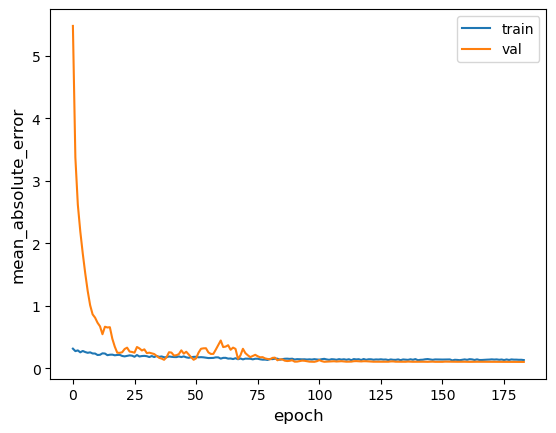

3/3 [==============================] - 0s 1ms/step - loss: 0.0732 - mean_absolute_error: 0.1371
Test accuracy 0.13708600401878357
Test loss 0.0732032060623169


In [42]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [43]:
y_test_pred = multi_dense_model.predict(x_test)

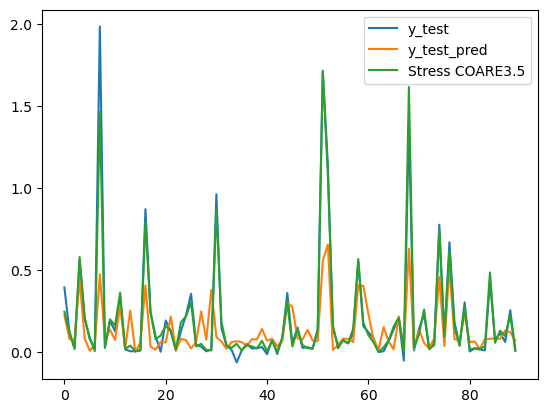

In [44]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [45]:
rmse(y_test.values, y_test_pred)

0.3915581931059297

## Correlation

In [46]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.75433742],
       [0.75433742, 1.        ]])

In [47]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

In [48]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [49]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [50]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 1s 17ms/step - loss: 2.6883 - mean_absolute_error: 1.4241 - val_loss: 536.6298 - val_mean_absolute_error: 22.3061
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 2.7194 - mean_absolute_error: 1.3501 - val_loss: 233.0325 - val_mean_absolute_error: 14.6095
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 2.4515 - mean_absolute_error: 1.3489 - val_loss: 132.2778 - val_mean_absolute_error: 10.9287
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 2.4748 - mean_absolute_error: 1.2906 - val_loss: 83.2997 - val_mean_absolute_error: 8.5982
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 2.2644 - mean_absolute_error: 1.2404 - val_loss: 55.4035 - val_mean_absolute_error: 6.9383
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 2.0632 - mean_absolute_error: 1.1512 - val_loss: 38.3889 - val_mean_absolute_error: 5.7002
Epoch 7/500
7/7 [====

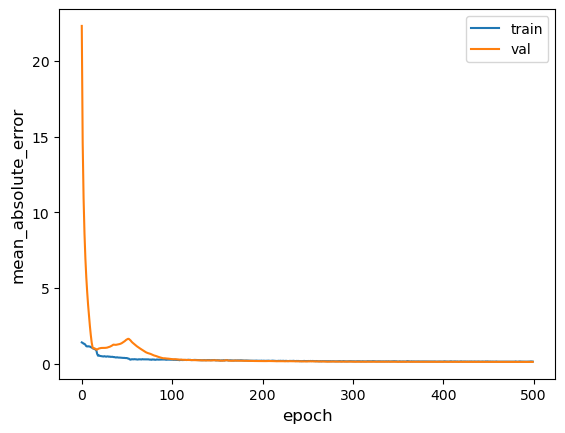

3/3 [==============================] - 0s 1ms/step - loss: 0.0569 - mean_absolute_error: 0.1307
Test accuracy 0.1306888312101364
Test loss 0.05689140781760216


In [51]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [52]:
y_test_pred = multi_dense_model.predict(x_test)

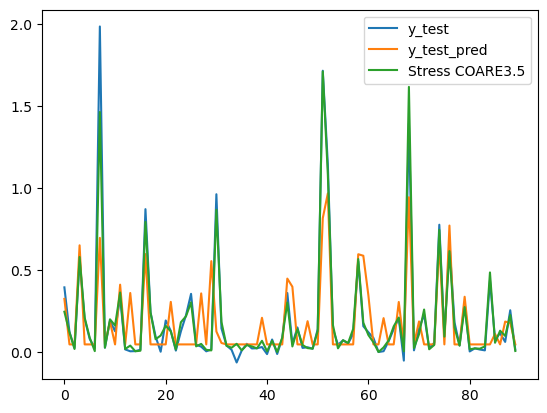

In [53]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [54]:
rmse(y_test.values, y_test_pred)

0.4246133797569089

## Correlation

In [55]:
y_test_pred.shape

(90, 1)

In [56]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.75400176],
       [0.75400176, 1.        ]])

In [57]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

In [58]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

### Best model!!!

In [59]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [60]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [61]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 0s 19ms/step - loss: 2.6122 - mean_absolute_error: 1.3980 - val_loss: 89.3707 - val_mean_absolute_error: 9.1134
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 1.9900 - mean_absolute_error: 1.1799 - val_loss: 31.9733 - val_mean_absolute_error: 5.4077
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 1.6442 - mean_absolute_error: 1.0295 - val_loss: 15.6948 - val_mean_absolute_error: 3.7582
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 1.2725 - mean_absolute_error: 0.8663 - val_loss: 7.6298 - val_mean_absolute_error: 2.5883
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 1.0637 - mean_absolute_error: 0.7883 - val_loss: 3.9901 - val_mean_absolute_error: 1.8474
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 1.1789 - mean_absolute_error: 0.8526 - val_loss: 2.6944 - val_mean_absolute_error: 1.5094
Epoch 7/500
7/7 [=============

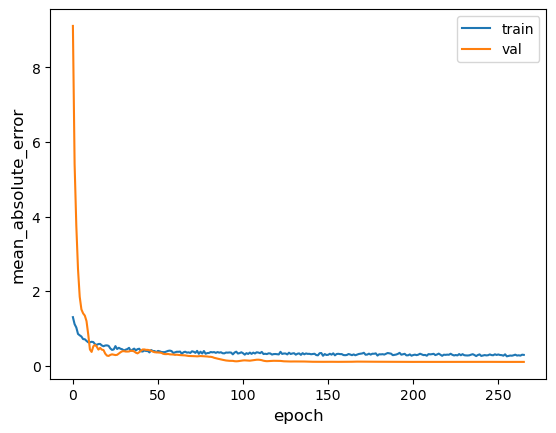

3/3 [==============================] - 0s 1ms/step - loss: 0.0838 - mean_absolute_error: 0.1495
Test accuracy 0.14952915906906128
Test loss 0.08375517278909683


In [62]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [63]:
y_test_pred = multi_dense_model.predict(x_test)

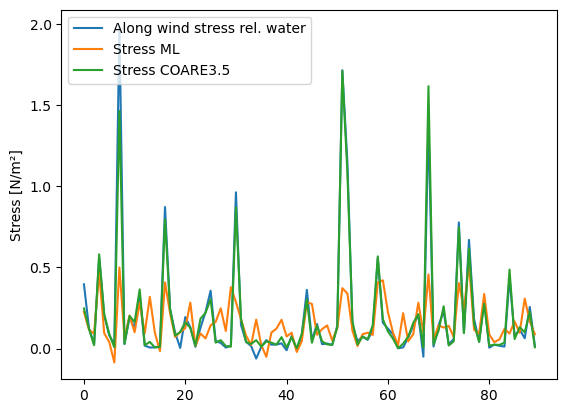

In [64]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [65]:
rmse(y_test.values, y_test_pred)

0.38170861285965213

In [66]:
rmse(y_test.values, c_test.values)

0.06884559918794826

In [67]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.66775856],
       [0.66775856, 1.        ]])

In [68]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

In [69]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [70]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [71]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
1/1 [==============================] - 1s 554ms/step - loss: 0.7458 - mean_absolute_error: 0.6547 - val_loss: 2864.8093 - val_mean_absolute_error: 52.3860
Epoch 2/500
1/1 [==============================] - 0s 24ms/step - loss: 0.6450 - mean_absolute_error: 0.5797 - val_loss: 1775.0504 - val_mean_absolute_error: 41.2380
Epoch 3/500
1/1 [==============================] - 0s 23ms/step - loss: 0.7143 - mean_absolute_error: 0.6527 - val_loss: 1249.2534 - val_mean_absolute_error: 34.5660
Epoch 4/500
1/1 [==============================] - 0s 24ms/step - loss: 0.6414 - mean_absolute_error: 0.6161 - val_loss: 952.3327 - val_mean_absolute_error: 30.1534
Epoch 5/500
1/1 [==============================] - 0s 23ms/step - loss: 0.6006 - mean_absolute_error: 0.5958 - val_loss: 756.7995 - val_mean_absolute_error: 26.8584
Epoch 6/500
1/1 [==============================] - 0s 22ms/step - loss: 0.5393 - mean_absolute_error: 0.5209 - val_loss: 622.1747 - val_mean_absolute_error: 24.3328
Epoch 

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
rmse(y_test.values, c_test.values)

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

#### Very unstable - get different results every time I run it

In [ ]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [ ]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [ ]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
rmse(y_test.values, c_test.values)

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

# __________________________________________________

# Using only s0_norm

In [ ]:
predictor_variables = ['s0_norm']

In [ ]:
x = df[predictor_variables]
x

In [ ]:
y = -  df['UWr'] * df['rhoair']
y

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

In [ ]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [ ]:
y_train = y[:split_idx]
y_test = y[split_idx:]

# ML setup

In [ ]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [ ]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

# First experiment - Linear regression

In [ ]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    #tf.keras.layers.Dense(16, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
np.mean(y_test)

In [ ]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
rmse(y_test.values, c_test)

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

# Other experiments

In [ ]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [ ]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [ ]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

In [ ]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [ ]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [ ]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
rmse(c_test.values, y_test.values)

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

In [ ]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [ ]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [ ]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
rmse(c_test.values, y_test.values)

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

In [ ]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [ ]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [ ]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
rmse(y_test.values, c_test)

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

In [ ]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [ ]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [ ]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

In [ ]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [ ]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [ ]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

In [ ]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [ ]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [ ]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

In [ ]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [ ]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [ ]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

In [ ]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [ ]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [ ]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
rmse(y_test.values, c_test.values)

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

In [ ]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [ ]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [ ]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
rmse(y_test.values, c_test.values)

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

In [ ]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [ ]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [202]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

7/7 [==============================] - 0s 4ms/step - loss: 2.7992 - mean_absolute_error: 1.2710 - val_loss: 16.4569 - val_mean_absolute_error: 3.8629
Epoch 7/500
7/7 [==============================] - 0s 4ms/step - loss: 2.0536 - mean_absolute_error: 1.1214 - val_loss: 13.1105 - val_mean_absolute_error: 3.4247
Epoch 8/500
7/7 [==============================] - 0s 5ms/step - loss: 2.7610 - mean_absolute_error: 1.2474 - val_loss: 10.5759 - val_mean_absolute_error: 3.0498
Epoch 9/500
7/7 [==============================] - 0s 5ms/step - loss: 1.6053 - mean_absolute_error: 1.0051 - val_loss: 8.7766 - val_mean_absolute_error: 2.7552
Epoch 10/500
7/7 [==============================] - 0s 5ms/step - loss: 1.8818 - mean_absolute_error: 1.0158 - val_loss: 7.3840 - val_mean_absolute_error: 2.5049
Epoch 11/500
7/7 [==============================] - 0s 4ms/step - loss: 1.7391 - mean_absolute_error: 0.9389 - val_loss: 6.0809 - val_mean_absolute_error: 2.2546
Epoch 12/500
7/7 [=======================

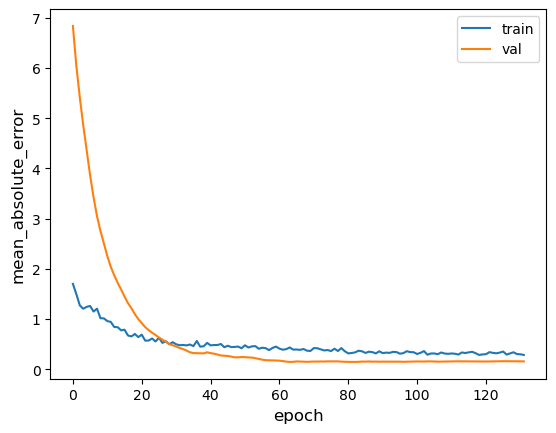

3/3 [==============================] - 0s 1ms/step - loss: 0.0796 - mean_absolute_error: 0.1946
Test accuracy 0.1945934295654297
Test loss 0.07959870249032974


In [203]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [204]:
y_test_pred = multi_dense_model.predict(x_test)

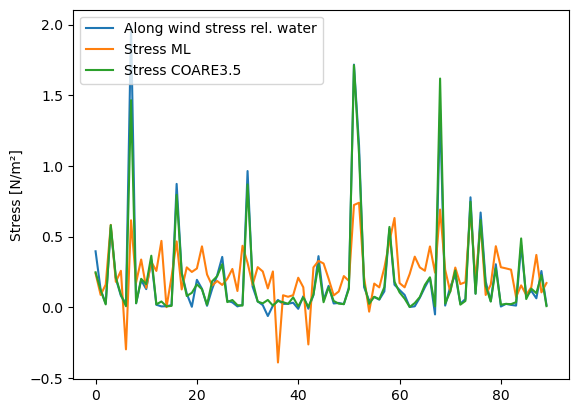

In [205]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [206]:
rmse(y_test.values, y_test_pred)

0.40618681078144026

In [207]:
rmse(y_test.values, c_test.values)

0.06884559918794826

In [208]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.62557337],
       [0.62557337, 1.        ]])

In [209]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

In [210]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [211]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [212]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
1/1 [==============================] - 1s 892ms/step - loss: 2.6739 - mean_absolute_error: 1.0363 - val_loss: 6.7949 - val_mean_absolute_error: 2.5652
Epoch 2/500
1/1 [==============================] - 0s 25ms/step - loss: 2.4993 - mean_absolute_error: 1.0519 - val_loss: 5.9132 - val_mean_absolute_error: 2.3929
Epoch 3/500
1/1 [==============================] - 0s 24ms/step - loss: 2.0525 - mean_absolute_error: 1.0259 - val_loss: 5.1004 - val_mean_absolute_error: 2.2224
Epoch 4/500
1/1 [==============================] - 0s 23ms/step - loss: 2.7495 - mean_absolute_error: 1.0520 - val_loss: 4.3748 - val_mean_absolute_error: 2.0583
Epoch 5/500
1/1 [==============================] - 0s 24ms/step - loss: 2.2364 - mean_absolute_error: 0.9975 - val_loss: 3.7494 - val_mean_absolute_error: 1.9055
Epoch 6/500
1/1 [==============================] - 0s 23ms/step - loss: 1.7967 - mean_absolute_error: 0.9603 - val_loss: 3.1534 - val_mean_absolute_error: 1.7477
Epoch 7/500
1/1 [==========

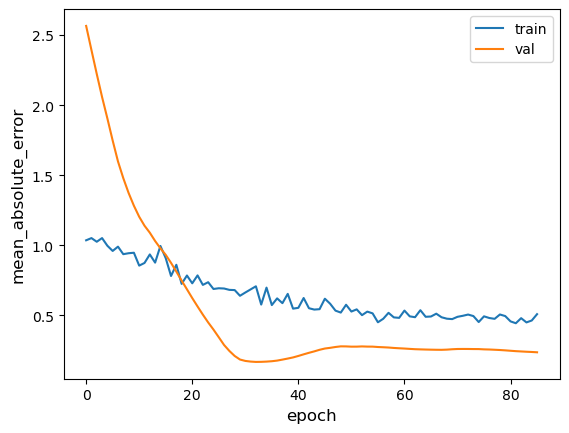

3/3 [==============================] - 0s 1ms/step - loss: 0.2266 - mean_absolute_error: 0.2862
Test accuracy 0.2861568331718445
Test loss 0.2266036570072174


In [213]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [214]:
y_test_pred = multi_dense_model.predict(x_test)

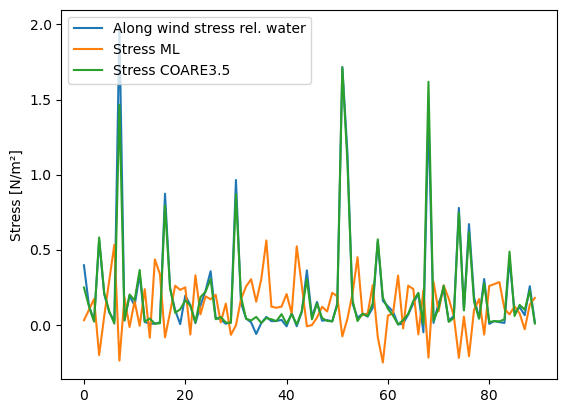

In [215]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [216]:
rmse(y_test.values, y_test_pred)

0.4011113738758496

In [217]:
rmse(y_test.values, c_test.values)

0.06884559918794826

In [218]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[ 1.        , -0.55184914],
       [-0.55184914,  1.        ]])

In [219]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

In [220]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [221]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [222]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
1/1 [==============================] - 1s 738ms/step - loss: 1.4665 - mean_absolute_error: 0.8239 - val_loss: 0.2744 - val_mean_absolute_error: 0.4727
Epoch 2/500
1/1 [==============================] - 0s 27ms/step - loss: 1.2916 - mean_absolute_error: 0.8105 - val_loss: 0.2037 - val_mean_absolute_error: 0.4043
Epoch 3/500
1/1 [==============================] - 0s 26ms/step - loss: 1.6782 - mean_absolute_error: 0.8392 - val_loss: 0.1679 - val_mean_absolute_error: 0.3646
Epoch 4/500
1/1 [==============================] - 0s 25ms/step - loss: 1.8714 - mean_absolute_error: 0.9319 - val_loss: 0.1547 - val_mean_absolute_error: 0.3490
Epoch 5/500
1/1 [==============================] - 0s 25ms/step - loss: 1.4740 - mean_absolute_error: 0.8614 - val_loss: 0.1391 - val_mean_absolute_error: 0.3300
Epoch 6/500
1/1 [==============================] - 0s 25ms/step - loss: 1.1263 - mean_absolute_error: 0.7532 - val_loss: 0.1280 - val_mean_absolute_error: 0.3160
Epoch 7/500
1/1 [==========

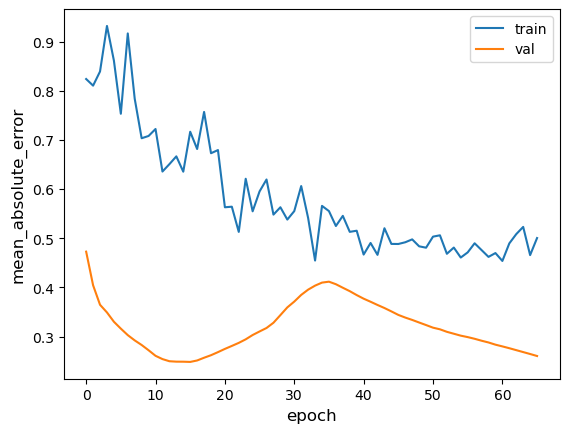

3/3 [==============================] - 0s 1ms/step - loss: 0.2140 - mean_absolute_error: 0.3438
Test accuracy 0.3438345491886139
Test loss 0.214020237326622


In [223]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [224]:
y_test_pred = multi_dense_model.predict(x_test)

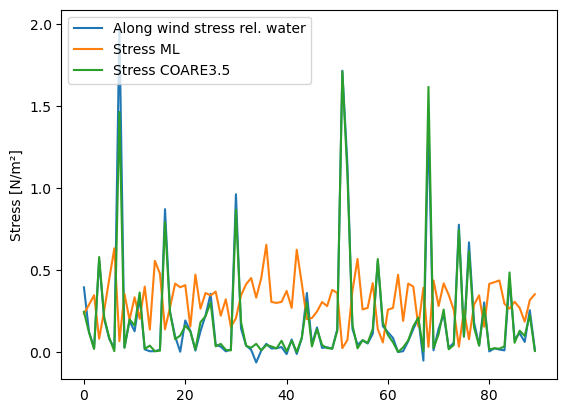

In [225]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [226]:
rmse(y_test.values, y_test_pred)

0.3952572010269366

In [227]:
rmse(y_test.values, c_test.values)

0.06884559918794826

In [228]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[ 1.        , -0.60381433],
       [-0.60381433,  1.        ]])

In [229]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

# predictors to use for the ML and validation: extraction


ml_predictors = [
    # # electromagnetic fluxes
    "IR",
    "Solar",
    # #---------- 
    # # specific humidities
    "Q10",
    "SSQ",
    "Qair",
    # #---------- 
    # # relative humidities
    "RH",
    # "RH10",
    # #---------- 
    # # air characteristics
    # "rhoair",
    # "P10",
    # "Pair",
    # #---------- 
    # # temperatures
    "SST",
    "T10",
    # "Tair",
    "Tsea",
    # "Tseasonic",
    # "Tsonic",
    # #---------- 
    # # waves
    # "Tm",
    "Tp",
    # "cp",
    "sigH",
    "sigHDir",
    # #---------- 
    # # wind characteristics
    # "U10e",
    "U10r",
    # "Ue",
    # "Ur",
    # "Wdir",
    "Wdirr",
    # #---------- 
    # # Obukhov scaling
    "moL",
    # "moLcbrt",
    # "moLclipped",
    # "moLinv",
    # #---------- 
    # # bulk fluxes
    "lhf",
    "shf",
    # # ----------
    # # composite variables
    # 'windspeed_over_wavecp',
    # 'mismatch_winddir_wavedir',
    # 'difference_specific_humidity',
    # # ----------
    # # others
    # "WTr",
    ## "Lv",
    # "stress",
]


# __________________________________________________

# s0_norm, inc, az

In [230]:
predictor_variables = ['s0_norm', 'inc', 'az']

In [231]:
x = df[predictor_variables]
x

,s0_norm,inc,az
300,-14.918911,40.733684,280.224518
381,-8.355029,40.732366,280.222870
108,-9.694715,40.723802,280.224518
94,-6.935540,42.400538,440.389984
289,-11.330360,33.757924,282.000641
...,...,...,...
293,-9.551195,33.754719,282.000427
235,-8.971364,40.732870,280.222595
84,-7.685976,42.397246,440.389404
95,-9.699736,31.666229,439.104034


In [232]:
y = -  df['UWr'] * df['rhoair']
y

300   -0.003707
381    0.124103
108    0.083250
94     0.229089
289    0.130489
         ...   
293    0.079242
235    0.116743
84     0.063755
95     0.256668
215    0.016093
Length: 410, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

In [233]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [234]:
y_train = y[:split_idx]
y_test = y[split_idx:]

# ML setup

In [235]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [236]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

# First experiment - Linear regression

In [237]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    #tf.keras.layers.Dense(16, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 0s 15ms/step - loss: 26380.6899 - mean_absolute_error: 158.6321 - val_loss: 27689.6484 - val_mean_absolute_error: 162.2599
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 26499.7117 - mean_absolute_error: 158.7892 - val_loss: 26798.2500 - val_mean_absolute_error: 159.6083
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 23944.9153 - mean_absolute_error: 151.2698 - val_loss: 25928.6074 - val_mean_absolute_error: 156.9784
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 23768.1118 - mean_absolute_error: 150.5750 - val_loss: 25069.7441 - val_mean_absolute_error: 154.3376
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 21962.5166 - mean_absolute_error: 144.9874 - val_loss: 24236.4316 - val_mean_absolute_error: 151.7316
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 21565.7375 - mean_absolute_error: 143.5221 - val_loss: 23418.71

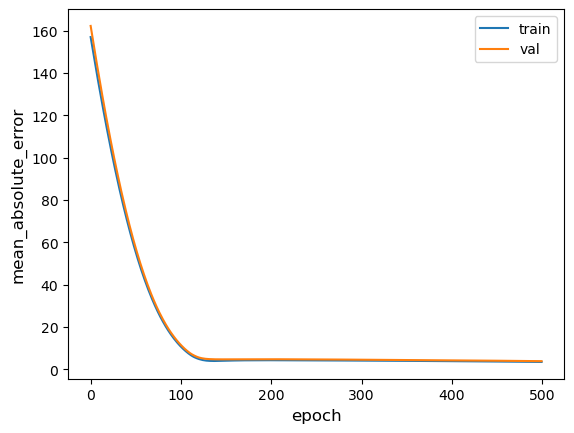

3/3 [==============================] - 0s 1ms/step - loss: 15.3903 - mean_absolute_error: 3.4539
Test accuracy 3.4539103507995605
Test loss 15.390300750732422


In [238]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [239]:
y_test_pred = multi_dense_model.predict(x_test)

In [240]:
np.mean(y_test)

0.20288953337977453

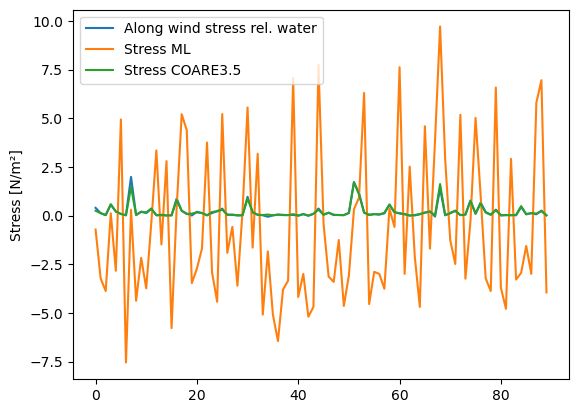

In [241]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [242]:
rmse(y_test.values, y_test_pred)

4.01926489386701

In [243]:
rmse(y_test.values, c_test)

0.06884559918794826

In [244]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.27362024],
       [0.27362024, 1.        ]])

In [245]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

# Other experiments

In [246]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [247]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [248]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
14/14 [==============================] - 0s 8ms/step - loss: 0.1290 - mean_absolute_error: 0.2593 - val_loss: 0.8244 - val_mean_absolute_error: 0.8172
Epoch 2/500
14/14 [==============================] - 0s 2ms/step - loss: 0.1081 - mean_absolute_error: 0.2216 - val_loss: 0.0388 - val_mean_absolute_error: 0.1415
Epoch 3/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0867 - mean_absolute_error: 0.2069 - val_loss: 0.0471 - val_mean_absolute_error: 0.1475
Epoch 4/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0742 - mean_absolute_error: 0.2050 - val_loss: 0.0296 - val_mean_absolute_error: 0.1406
Epoch 5/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0860 - mean_absolute_error: 0.2158 - val_loss: 0.0332 - val_mean_absolute_error: 0.1553
Epoch 6/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0939 - mean_absolute_error: 0.2164 - val_loss: 0.0663 - val_mean_absolute_error: 0.2304
Epoch 7/500
14/14 [===

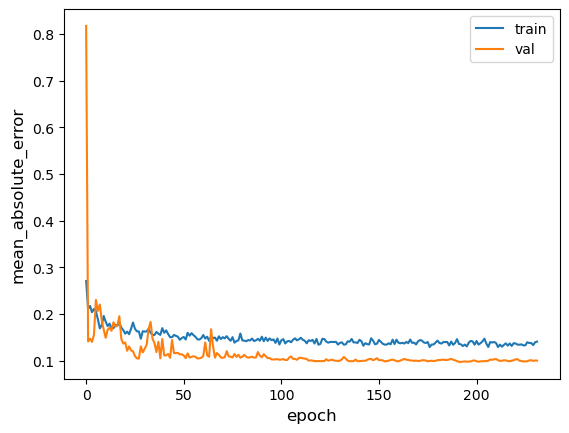

3/3 [==============================] - 0s 1ms/step - loss: 0.0719 - mean_absolute_error: 0.1508
Test accuracy 0.1507771760225296
Test loss 0.07186198979616165


In [249]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [250]:
y_test_pred = multi_dense_model.predict(x_test)

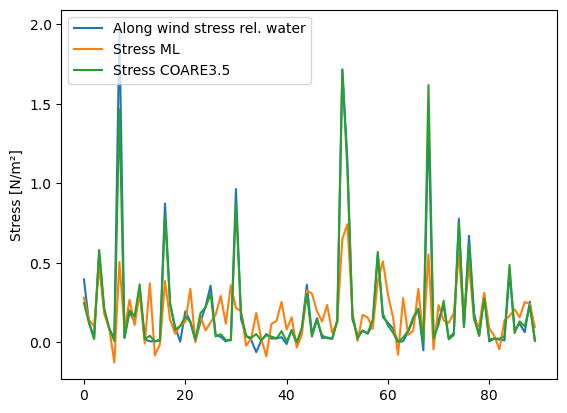

In [251]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [252]:
rmse(y_test.values, y_test_pred)

0.39382923974647155

In [253]:
rmse(y_test.values, c_test.values)

0.06884559918794826

In [254]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.       , 0.7025485],
       [0.7025485, 1.       ]])

In [255]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

In [256]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [257]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [258]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
14/14 [==============================] - 1s 9ms/step - loss: 1.6330 - mean_absolute_error: 1.0236 - val_loss: 24.1419 - val_mean_absolute_error: 4.8597
Epoch 2/500
14/14 [==============================] - 0s 3ms/step - loss: 1.1658 - mean_absolute_error: 0.8628 - val_loss: 21.7744 - val_mean_absolute_error: 4.6207
Epoch 3/500
14/14 [==============================] - 0s 2ms/step - loss: 1.3241 - mean_absolute_error: 0.8768 - val_loss: 17.8326 - val_mean_absolute_error: 4.1753
Epoch 4/500
14/14 [==============================] - 0s 2ms/step - loss: 0.8974 - mean_absolute_error: 0.7561 - val_loss: 13.4177 - val_mean_absolute_error: 3.6086
Epoch 5/500
14/14 [==============================] - 0s 2ms/step - loss: 0.9344 - mean_absolute_error: 0.7654 - val_loss: 8.9123 - val_mean_absolute_error: 2.9247
Epoch 6/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6085 - mean_absolute_error: 0.5979 - val_loss: 6.1493 - val_mean_absolute_error: 2.4076
Epoch 7/500
14/14 

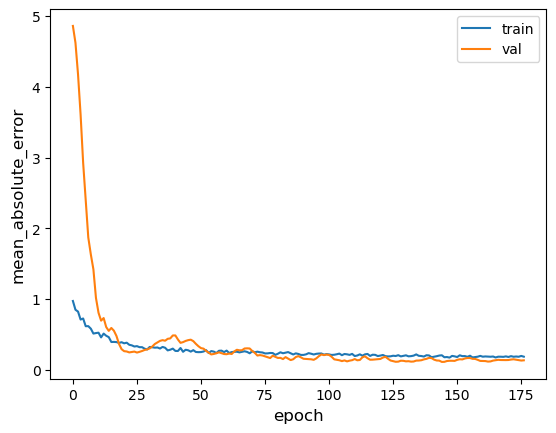

3/3 [==============================] - 0s 2ms/step - loss: 0.0950 - mean_absolute_error: 0.1984
Test accuracy 0.19842751324176788
Test loss 0.09504609555006027


In [259]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [260]:
y_test_pred = multi_dense_model.predict(x_test)

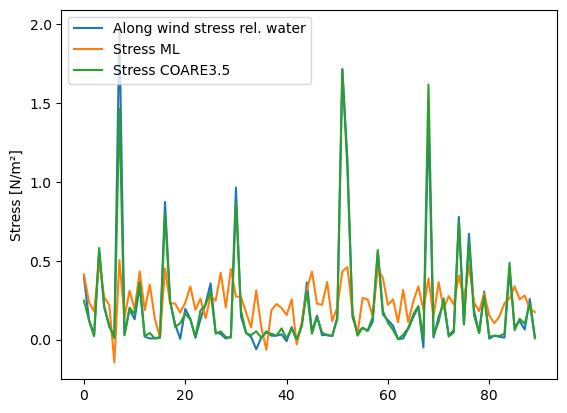

In [261]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [262]:
rmse(y_test.values, y_test_pred)

0.3791787986583091

In [263]:
rmse(y_test.values, c_test.values)

0.06884559918794826

In [264]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.55203208],
       [0.55203208, 1.        ]])

In [265]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

In [266]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [267]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [268]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.1),
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
1/1 [==============================] - 1s 707ms/step - loss: 1.6848 - mean_absolute_error: 1.0456 - val_loss: 187.3262 - val_mean_absolute_error: 13.4611
Epoch 2/500
1/1 [==============================] - 0s 30ms/step - loss: 0.9650 - mean_absolute_error: 0.7781 - val_loss: 96.2721 - val_mean_absolute_error: 9.6475
Epoch 3/500
1/1 [==============================] - 0s 30ms/step - loss: 0.9308 - mean_absolute_error: 0.6909 - val_loss: 74.5205 - val_mean_absolute_error: 8.4793
Epoch 4/500
1/1 [==============================] - 0s 28ms/step - loss: 0.8301 - mean_absolute_error: 0.7332 - val_loss: 74.2409 - val_mean_absolute_error: 8.4694
Epoch 5/500
1/1 [==============================] - 0s 28ms/step - loss: 0.6303 - mean_absolute_error: 0.6405 - val_loss: 66.0262 - val_mean_absolute_error: 7.9825
Epoch 6/500
1/1 [==============================] - 0s 28ms/step - loss: 0.5573 - mean_absolute_error: 0.5792 - val_loss: 53.1184 - val_mean_absolute_error: 7.1597
Epoch 7/500
1/1 [==

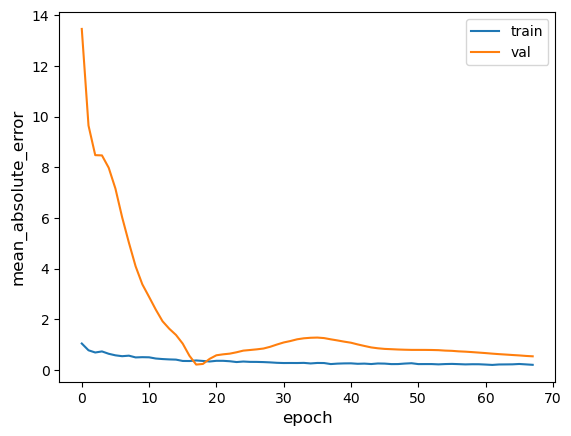

3/3 [==============================] - 0s 1ms/step - loss: 0.3571 - mean_absolute_error: 0.5511
Test accuracy 0.5511001348495483
Test loss 0.3570709228515625


In [269]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [270]:
y_test_pred = multi_dense_model.predict(x_test)

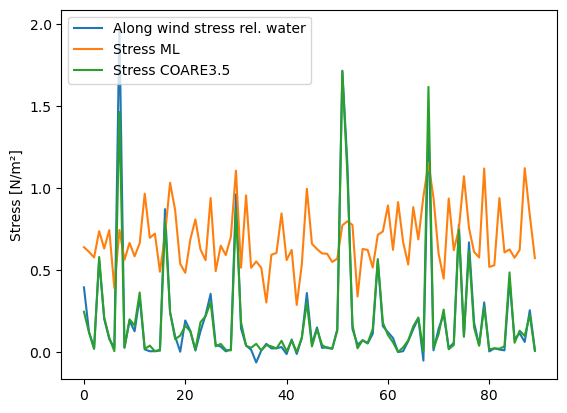

In [271]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [272]:
rmse(y_test.values, y_test_pred)

0.629904534628915

In [273]:
rmse(y_test.values, c_test.values)

0.06884559918794826

In [274]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.30132438],
       [0.30132438, 1.        ]])

In [275]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98281594],
       [0.98281594, 1.        ]])

# __________________________________________________

# s0, s0_max, S0_min, inc, az

## s0 is the average

In [276]:
predictor_variables = ['s0', 's0_max', 's0_min', 'inc', 'az']

In [277]:
x = df[predictor_variables]
x

,s0,s0_max,s0_min,inc,az
300,-29.809161,-29.809161,-29.809161,40.733684,280.224518
381,-16.680374,-16.680374,-16.680374,40.732366,280.222870
108,-19.353100,-19.353100,-19.353100,40.723802,280.224518
94,-15.135897,-15.135897,-15.135897,42.400538,440.389984
289,-17.218870,-17.218870,-17.218870,33.757924,282.000641
...,...,...,...,...,...
293,-13.658052,-13.658052,-13.658052,33.754719,282.000427
235,-17.913435,-17.913435,-17.913435,40.732870,280.222595
84,-16.634214,-16.634214,-16.634214,42.397246,440.389404
95,-12.334466,-12.334466,-12.334466,31.666229,439.104034


In [278]:
y = -  df['UWr'] * df['rhoair']
y

300   -0.003707
381    0.124103
108    0.083250
94     0.229089
289    0.130489
         ...   
293    0.079242
235    0.116743
84     0.063755
95     0.256668
215    0.016093
Length: 410, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

In [279]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [280]:
y_train = y[:split_idx]
y_test = y[split_idx:]

# ML setup

In [281]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [282]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

# First experiment - Linear regression

In [ ]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    #tf.keras.layers.Dense(16, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
7/7 [==============================] - 0s 15ms/step - loss: 29841.6333 - mean_absolute_error: 169.2738 - val_loss: 31516.2637 - val_mean_absolute_error: 173.5462
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 30063.6921 - mean_absolute_error: 169.6006 - val_loss: 30460.5762 - val_mean_absolute_error: 170.5882
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 27286.9272 - mean_absolute_error: 161.9455 - val_loss: 29434.1895 - val_mean_absolute_error: 167.6624
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 27915.6497 - mean_absolute_error: 163.3737 - val_loss: 28420.7559 - val_mean_absolute_error: 164.7229
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 25730.5701 - mean_absolute_error: 157.1136 - val_loss: 27440.8184 - val_mean_absolute_error: 161.8300
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 25491.1760 - mean_absolute_error: 156.2117 - val_loss: 26478.49

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
np.mean(y_test)

In [ ]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
rmse(y_test.values, c_test)

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

# Other experiments

In [ ]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [ ]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [ ]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
rmse(y_test.values, c_test.values)

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

In [ ]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [ ]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [ ]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
rmse(y_test.values, c_test.values)

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

In [ ]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [ ]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [ ]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.1),
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
rmse(y_test.values, c_test.values)

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

# __________________________________________________

# s0, s0_max, s0_min, s0_std, inc, az

In [ ]:
predictor_variables = ['s0', 's0_max', 's0_min', 's0_std', 'inc', 'az']

In [ ]:
x = df[predictor_variables]
x

In [ ]:
y = -  df['UWr'] * df['rhoair']
y

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

In [ ]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [ ]:
y_train = y[:split_idx]
y_test = y[split_idx:]

# ML setup

In [ ]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [ ]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

# First experiment - Linear regression

In [ ]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    #tf.keras.layers.Dense(16, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
np.mean(y_test)

In [ ]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
rmse(y_test.values, c_test)

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

# Other experiments

In [ ]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [ ]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [ ]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
rmse(y_test.values, c_test.values)

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

In [ ]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [ ]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [ ]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
rmse(y_test.values, c_test.values)

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

In [ ]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [ ]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [ ]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.1),
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
rmse(y_test.values, c_test.values)

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)